### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

### Import Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Pre-data understanding

In [5]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
churn = len(df[df['Churn']=='Yes'])
nochurn = len(df[df['Churn']=='No'])
print(df.shape)
print(f'Churns: {churn}')
print(f'No Churns: {nochurn}')

(7032, 21)
Churns: 1869
No Churns: 5163


<AxesSubplot:xlabel='Churn', ylabel='count'>

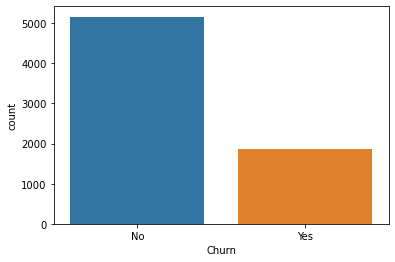

In [7]:
sns.countplot(data=df,x='Churn')

Imbalanced dataset

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing data

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### EDA
Categorical Features

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

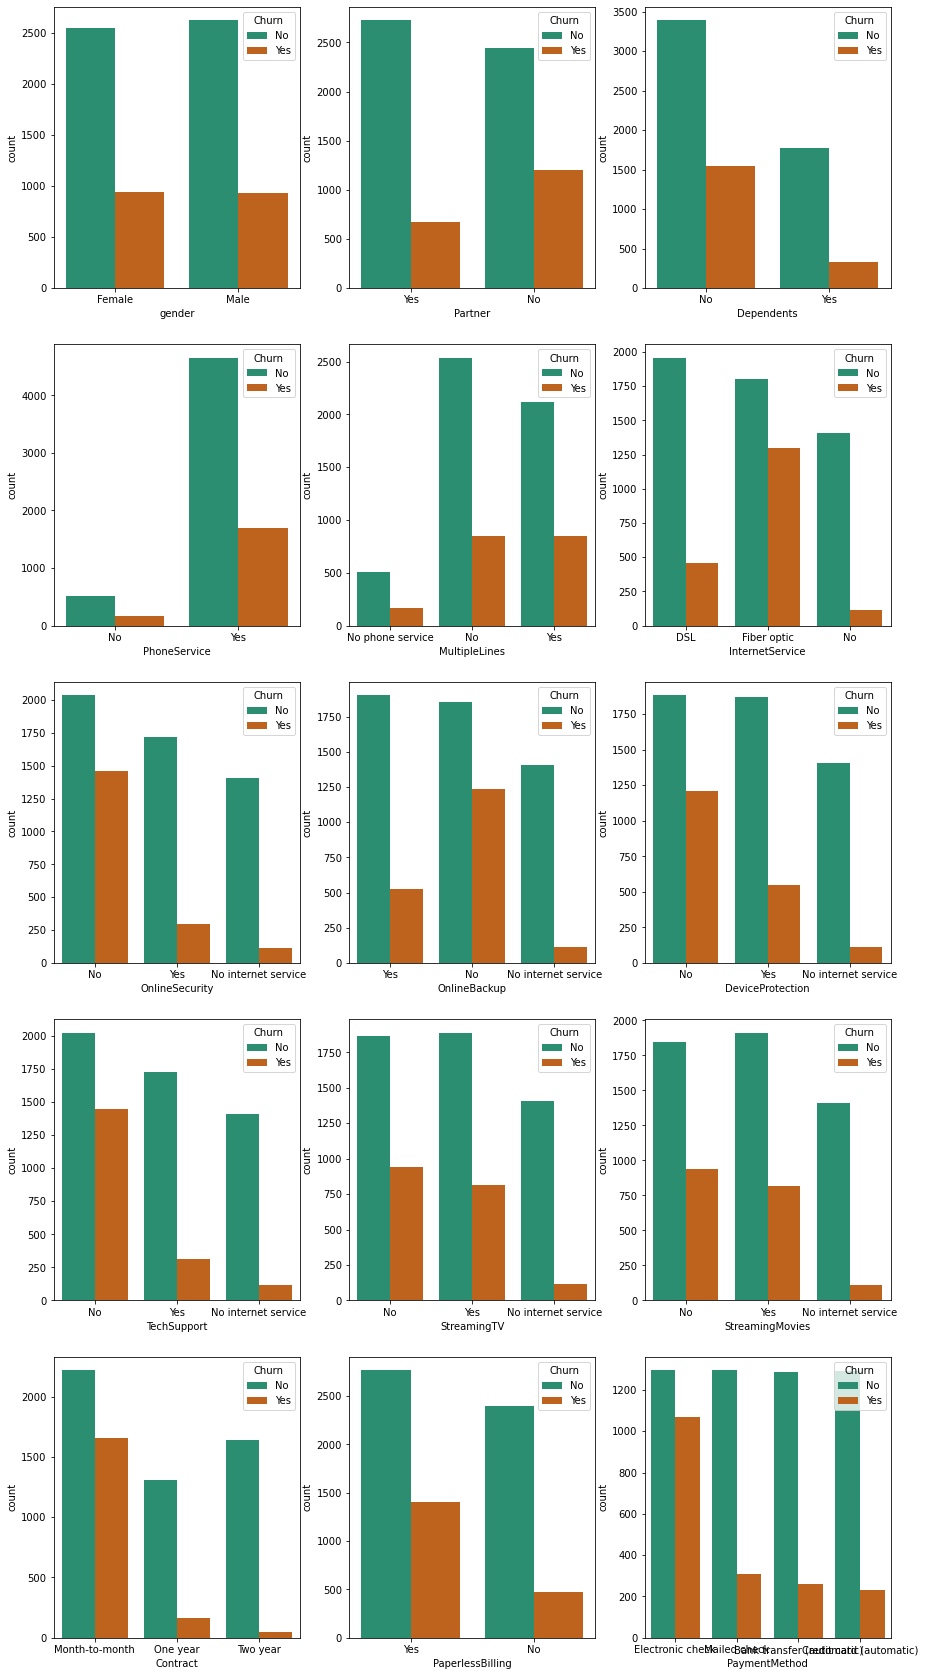

In [11]:
fig,axes = plt.subplots(5,3,figsize=(15,30))
axes = axes.flatten()

categories = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for i in range(len(categories)):
    ax = sns.countplot(x=categories[i], data=df, ax=axes[i], hue='Churn', palette='Dark2')

__Noticebale Trends__:
1. Higher churn rate for customers under Month-to-Month contract
2. Higher churn rate for customers using Fiber Optic internet service
3. Higher churn rate for customers having no tech support and no online security
4. Higher churn rate for customers with Elctronic check as the payment method

Numerical Features

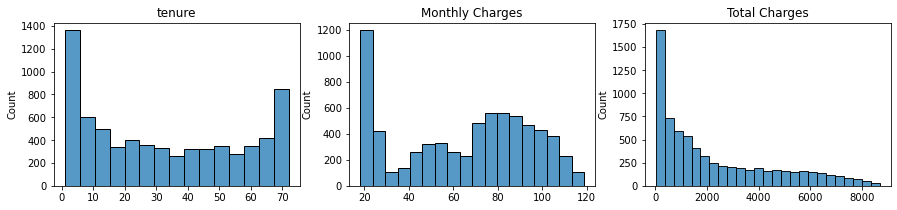

In [12]:
fig,axes = plt.subplots(1,3,figsize=(15,3))
numeric = ['tenure','MonthlyCharges','TotalCharges']

ax = sns.histplot(df['tenure'].values, ax=axes[0]).set_title('tenure')
ax = sns.histplot(df['MonthlyCharges'].values, ax=axes[1]).set_title('Monthly Charges')
ax = sns.histplot(df['TotalCharges'].values, ax=axes[2]).set_title('Total Charges')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

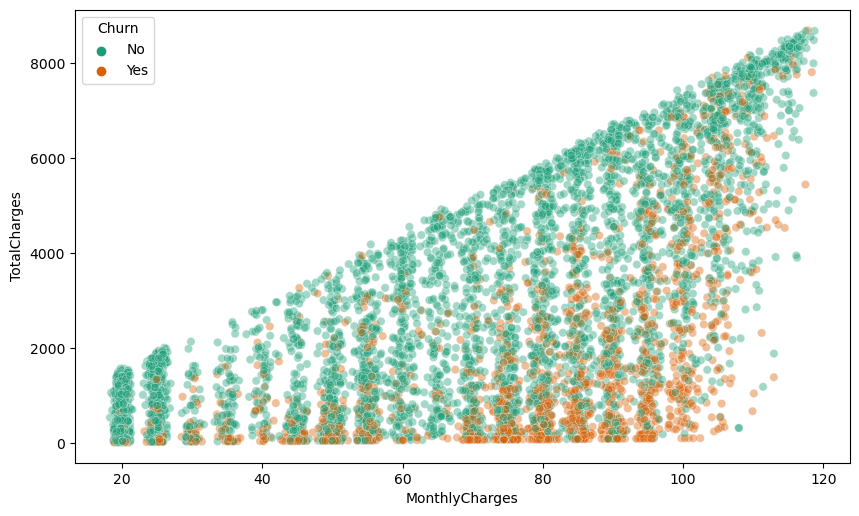

In [13]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.4,palette='Dark2')

__Noticeable Trends__:
1. Most users churned within first 5 months
2. Higher the monthly or total charges, more likely the customer will churn
3. Company will benefit when customers will stay for longer duration even if monthly charges are low, the total charges at the end will increase, whereas with high monthly charges the likelihood of customer churning is more which leads to less profits for the company

<AxesSubplot:xlabel='tenure'>

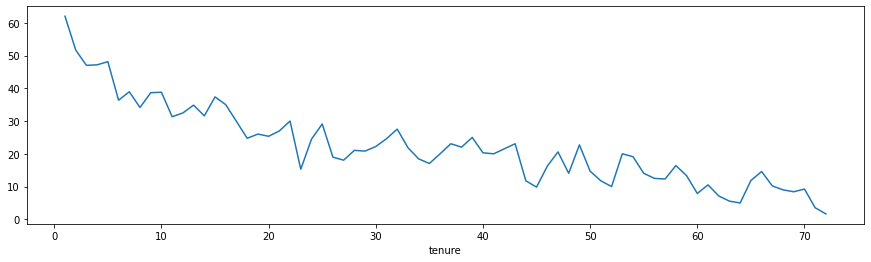

In [14]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

churn_per = 100*yes_churn/(yes_churn+no_churn)

plt.figure(figsize=(15,4))
churn_per.transpose()['customerID'].plot()

As can be seen in above plot, churn percentage decreases with increasing tenure

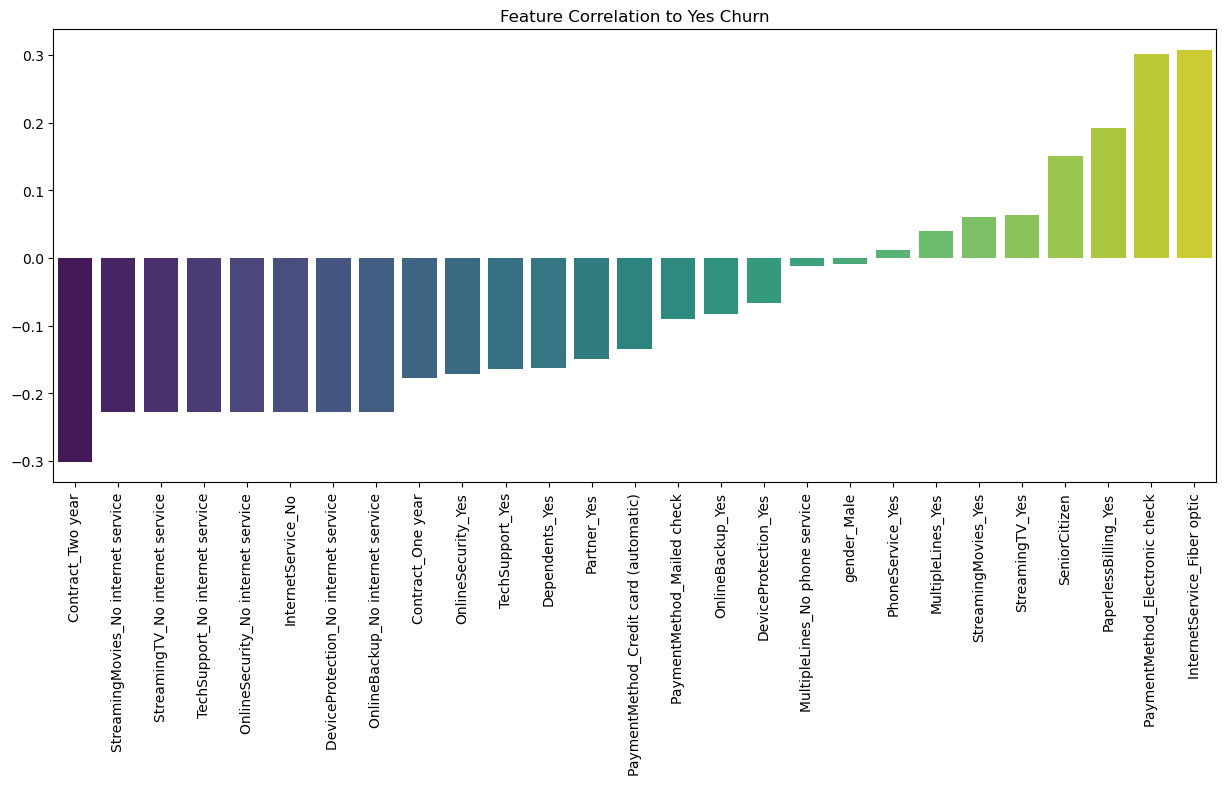

In [15]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']],drop_first=True).corr()

corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[0:-1]

plt.figure(figsize=(15,6),dpi=100)
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values,palette='viridis')
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

### Get Dummies for categorical features

In [16]:
df = df.set_index('customerID')
X = pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)
y = df['Churn']

In [17]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
2234-XADUH,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [18]:
y

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7032, dtype: object

### Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Base Models

In [20]:
model = []
acc = []

### 1. Decision Trees

In [21]:
model.append('Decision Trees')

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

              precision    recall  f1-score   support

          No       0.85      0.78      0.82       557
         Yes       0.37      0.47      0.41       147

    accuracy                           0.72       704
   macro avg       0.61      0.63      0.61       704
weighted avg       0.75      0.72      0.73       704



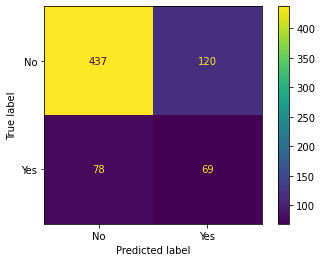

In [22]:
acc.append(accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
plot_confusion_matrix(dt,X_test,y_test)

### 2. Random Forest Classifier

In [23]:
model.append('Random Forest')

rmf = RandomForestClassifier(n_estimators=100) # default param
rmf.fit(X_train,y_train)
rmf_pred = rmf.predict(X_test)

              precision    recall  f1-score   support

          No       0.85      0.90      0.88       557
         Yes       0.52      0.41      0.46       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.78      0.80      0.79       704



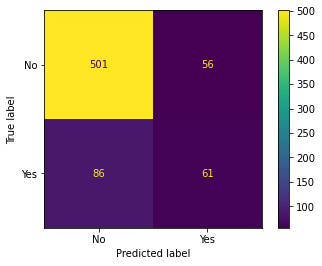

In [24]:
acc.append(accuracy_score(y_test,rmf_pred))
print(classification_report(y_test,rmf_pred))
plot_confusion_matrix(rmf,X_test,y_test)

### 3. Gradient Descent Boost

In [25]:
model.append('Gradient Descent Boost')
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1) # default param
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



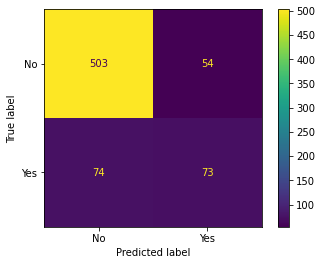

In [26]:
acc.append(accuracy_score(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
plot_confusion_matrix(gb,X_test,y_test)

### 4. Ada Boost

In [27]:
model.append('Ada Boost')
ab = AdaBoostClassifier(n_estimators=50,learning_rate=1.0) # defualt param
ab.fit(X_train,y_train)
ab_pred = ab.predict(X_test)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



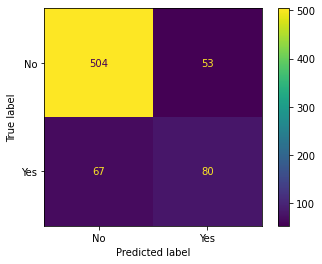

In [28]:
acc.append(accuracy_score(y_test,ab_pred))
print(classification_report(y_test,ab_pred))
plot_confusion_matrix(ab,X_test,y_test)

### Base Model Results

In [29]:
data = {'Models':model,
       'Accuracy':acc}
df_res = pd.DataFrame(data)

In [30]:
df_res

,Models,Accuracy
0,Decision Trees,0.718750
1,Random Forest,0.798295
2,Gradient Descent Boost,0.818182
3,Ada Boost,0.829545


1. We can observe scores are pretty bad
2. Looking at confusion matrix of all models(bad recall scores), models are missing a lot of actual churned users
3. These bad recall scores are most likely due to imbalance in the dataset

### Feature Importance

In [31]:
dt_feat = pd.DataFrame(index=X.columns, data=dt.feature_importances_, columns=['Feature Importance'])
rmf_feat = pd.DataFrame(index=X.columns, data=rmf.feature_importances_, columns=['Feature Importance'])
gb_feat = pd.DataFrame(index=X.columns, data=gb.feature_importances_, columns=['Feature Importance'])
ab_feat = pd.DataFrame(index=X.columns, data=ab.feature_importances_, columns=['Feature Importance'])

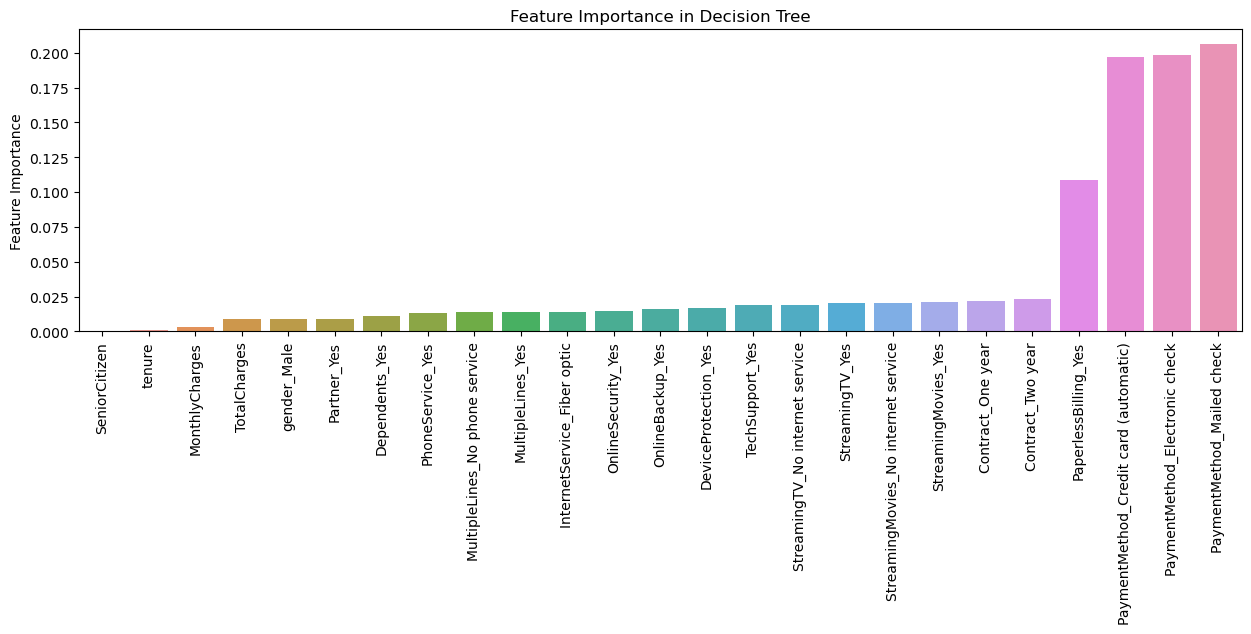

In [34]:
dt_feat = dt_feat[dt_feat['Feature Importance']>0]
plt.figure(figsize=(15,4),dpi=100)
sns.barplot(data=dt_feat.sort_values('Feature Importance'),x=dt_feat.index,y='Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=90);

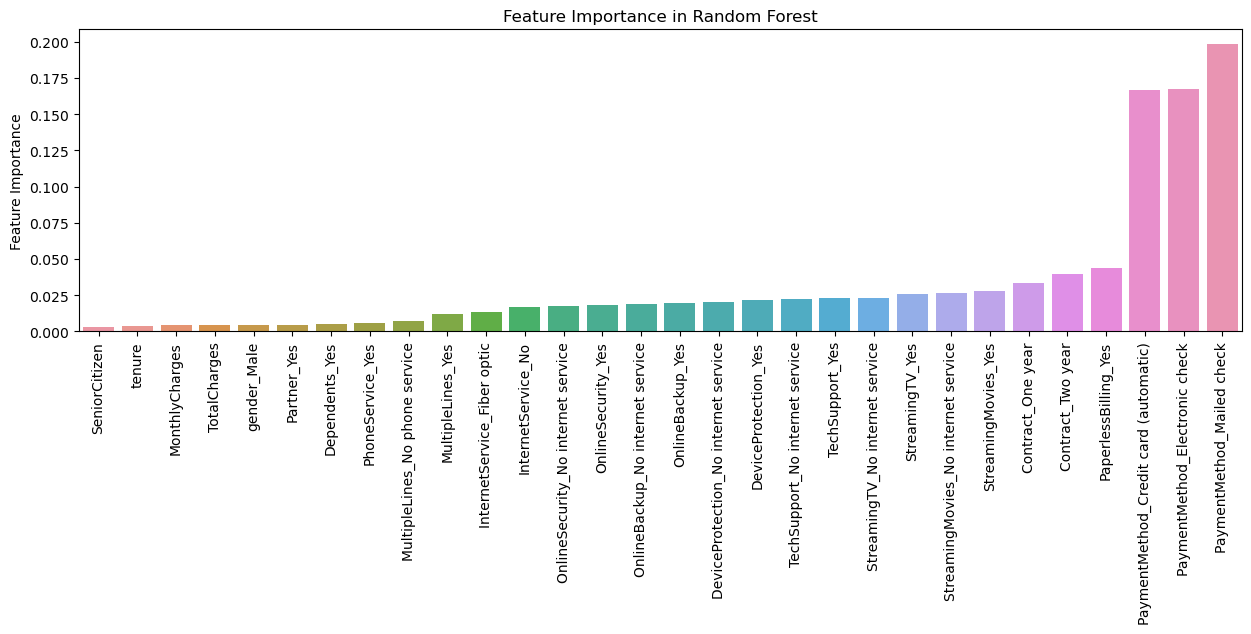

In [35]:
rmf_feat = rmf_feat[rmf_feat['Feature Importance']>0]
plt.figure(figsize=(15,4),dpi=100)
sns.barplot(data=rmf_feat.sort_values('Feature Importance'),x=rmf_feat.index,y='Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=90);

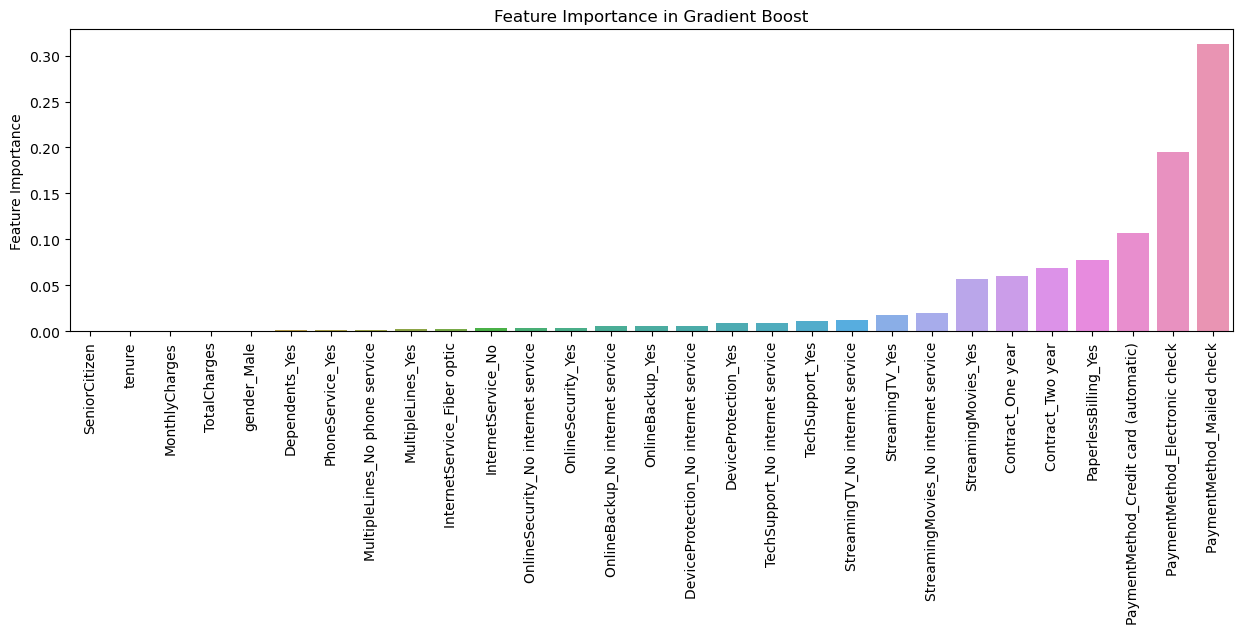

In [36]:
gb_feat = gb_feat[gb_feat['Feature Importance']>0]
plt.figure(figsize=(15,4),dpi=100)
sns.barplot(data=gb_feat.sort_values('Feature Importance'),x=gb_feat.index,y='Feature Importance')
plt.title('Feature Importance in Gradient Boost')
plt.xticks(rotation=90);

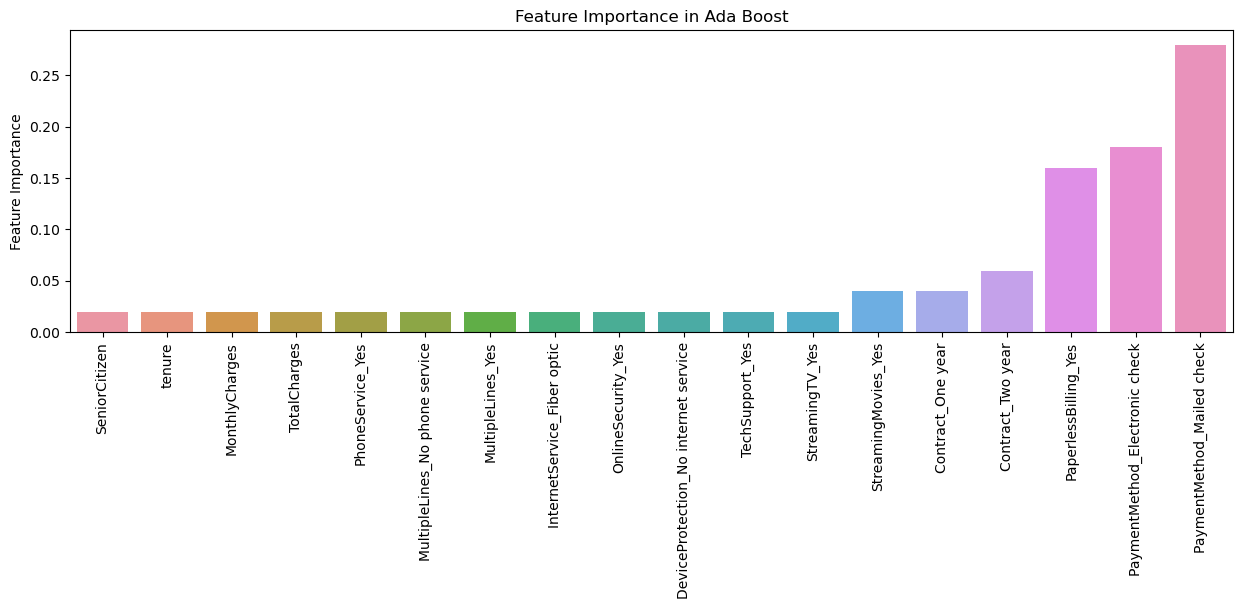

In [37]:
ab_feat = ab_feat[ab_feat['Feature Importance']>0]
plt.figure(figsize=(15,4),dpi=100)
sns.barplot(data=ab_feat.sort_values('Feature Importance'),x=ab_feat.index,y='Feature Importance')
plt.title('Feature Importance in Ada Boost')
plt.xticks(rotation=90);

1. We can see that PaymentMethod is the most important feature across all 4 models

### Perform Oversampling
As our dataset is imbalanced, we can use oversampling technique. We will use simple oversampling which involves randomly duplicating rows from minority class in training dataset

In [38]:
print(df.shape)
print(f'Churns: {churn}')
print(f'No Churns: {nochurn}')

(7032, 20)
Churns: 1869
No Churns: 5163


In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
ros = RandomOverSampler(sampling_strategy='not majority')
x_res, y_res = ros.fit_resample(X,y)

In [44]:
churn = len(y_res[y_res=='Yes'])
nochurn = len(y_res[y_res=='No'])
print(x_res.shape)
print(y_res.shape)
print(f'Churns: {churn}')
print(f'No Churns: {nochurn}')

(10326, 30)
(10326,)
Churns: 5163
No Churns: 5163


After performing Random Oversampling, dataset has become balanced with a ratio of 1:1 for Churn class

### Train Test Split over sampled data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=101)

### 1. Decision Tree

              precision    recall  f1-score   support

          No       0.93      0.77      0.85      1285
         Yes       0.81      0.94      0.87      1297

    accuracy                           0.86      2582
   macro avg       0.87      0.86      0.86      2582
weighted avg       0.87      0.86      0.86      2582



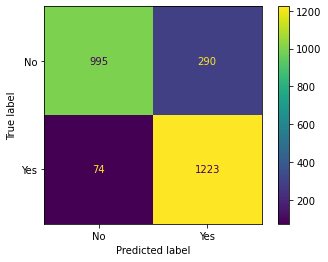

In [46]:
model.append('Decision Trees OverSampled')

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

acc.append(accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
plot_confusion_matrix(dt,X_test,y_test)

### 2. Random Forest

              precision    recall  f1-score   support

          No       0.94      0.83      0.88      1285
         Yes       0.85      0.94      0.89      1297

    accuracy                           0.89      2582
   macro avg       0.89      0.89      0.88      2582
weighted avg       0.89      0.89      0.88      2582



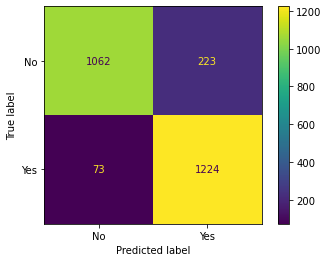

In [47]:
model.append('Random Forest OverSampled')

rmf = RandomForestClassifier(n_estimators=100) # default param
rmf.fit(X_train,y_train)
rmf_pred = rmf.predict(X_test)

acc.append(accuracy_score(y_test,rmf_pred))
print(classification_report(y_test,rmf_pred))
plot_confusion_matrix(rmf,X_test,y_test)

### 3. Gradient Decent Boost

              precision    recall  f1-score   support

          No       0.81      0.74      0.77      1285
         Yes       0.76      0.83      0.79      1297

    accuracy                           0.78      2582
   macro avg       0.79      0.78      0.78      2582
weighted avg       0.79      0.78      0.78      2582



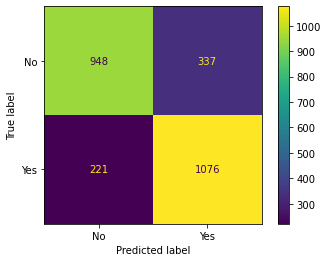

In [48]:
model.append('Gradient Descent Boost OverSampled')
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1) # default param
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

acc.append(accuracy_score(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
plot_confusion_matrix(gb,X_test,y_test)

### 4. Ada Boost

              precision    recall  f1-score   support

          No       0.80      0.72      0.76      1285
         Yes       0.75      0.82      0.78      1297

    accuracy                           0.77      2582
   macro avg       0.77      0.77      0.77      2582
weighted avg       0.77      0.77      0.77      2582



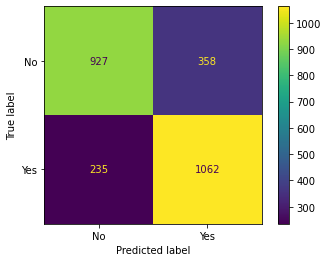

In [49]:
model.append('Ada Boost OverSampled')
ab = AdaBoostClassifier(n_estimators=50,learning_rate=1.0) # defualt param
ab.fit(X_train,y_train)
ab_pred = ab.predict(X_test)

acc.append(accuracy_score(y_test,ab_pred))
print(classification_report(y_test,ab_pred))
plot_confusion_matrix(ab,X_test,y_test)

### Over-Sampled Model Results

In [50]:
data = {'Models':model,
       'Accuracy':acc}
df_res = pd.DataFrame(data)
df_res

,Models,Accuracy
0,Decision Trees,0.718750
1,Random Forest,0.798295
2,Gradient Descent Boost,0.818182
3,Ada Boost,0.829545
4,Decision Trees OverSampled,0.859024
5,Random Forest OverSampled,0.885360
6,Gradient Descent Boost OverSampled,0.783888
7,Ada Boost OverSampled,0.770333


1. We can observe that accuracy of Decision Tree and Random Forest increases 
2. Overall recall of all 4 models imporved

### Hyperparameter Tuning

### 1. Decision Tree

In [51]:
dt_param_grid = {'max_depth':[10,15,20],
                'min_samples_split':[2,7,10,20],
                'min_samples_leaf':[2,4,7,10]}
print(dt_param_grid)

{'max_depth': [10, 15, 20], 'min_samples_split': [2, 7, 10, 20], 'min_samples_leaf': [2, 4, 7, 10]}


In [52]:
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,dt_param_grid)
dt_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [2, 4, 7, 10],
                         'min_samples_split': [2, 7, 10, 20]})

In [53]:
dt_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [54]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2)

              precision    recall  f1-score   support

          No       0.84      0.78      0.81      1285
         Yes       0.80      0.86      0.83      1297

    accuracy                           0.82      2582
   macro avg       0.82      0.82      0.82      2582
weighted avg       0.82      0.82      0.82      2582



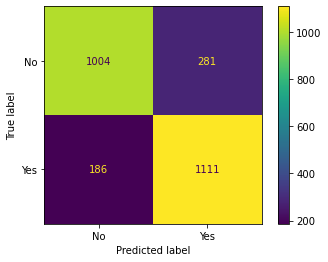

In [55]:
dt_best = dt_grid.best_estimator_
y1_pred = dt_best.predict(X_test)

model.append('Decision Tree (HT)')
acc.append(accuracy_score(y_test,y1_pred))
print(classification_report(y_test,y1_pred))
plot_confusion_matrix(dt_best,X_test,y_test)

### 2. Random Forest

In [56]:
rmf_param_grid = {'n_estimators':[40,100,120,160,200],
                  'max_depth':[10,15,20],
                  'min_samples_split':[2,7,10,20],
                  'min_samples_leaf':[2,4,7,10],
                  'bootstrap':[True,False]}
print(rmf_param_grid)

{'n_estimators': [40, 100, 120, 160, 200], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 7, 10, 20], 'min_samples_leaf': [2, 4, 7, 10], 'bootstrap': [True, False]}


In [57]:
rmf = RandomForestClassifier()
rmf_grid = GridSearchCV(rmf,rmf_param_grid)
rmf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [2, 4, 7, 10],
                         'min_samples_split': [2, 7, 10, 20],
                         'n_estimators': [40, 100, 120, 160, 200]})

In [58]:
rmf_grid.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [59]:
rmf_grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=200)

              precision    recall  f1-score   support

          No       0.92      0.83      0.88      1285
         Yes       0.85      0.93      0.89      1297

    accuracy                           0.88      2582
   macro avg       0.89      0.88      0.88      2582
weighted avg       0.89      0.88      0.88      2582



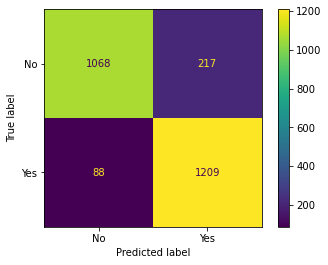

In [68]:
rmf_best = rmf_grid.best_estimator_
y2_pred = rmf_best.predict(X_test)

model.append('Random Forest (HT)')
acc.append(accuracy_score(y_test,y2_pred))
print(classification_report(y_test,y2_pred))
plot_confusion_matrix(rmf_best,X_test,y_test)

### 3. Gradient Descent Boost

In [63]:
gb_param_grid = {'n_estimators':[40,100,120,160,200],
                 'learning_rate':[0.1,0.5,1,2]}
print(gb_param_grid)

{'n_estimators': [40, 100, 120, 160, 200], 'learning_rate': [0.1, 0.5, 1, 2]}


In [64]:
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb,gb_param_grid)
gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1, 2],
                         'n_estimators': [40, 100, 120, 160, 200]})

In [65]:
gb_grid.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [66]:
gb_grid.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=200)

              precision    recall  f1-score   support

          No       0.89      0.78      0.83      1285
         Yes       0.80      0.90      0.85      1297

    accuracy                           0.84      2582
   macro avg       0.85      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



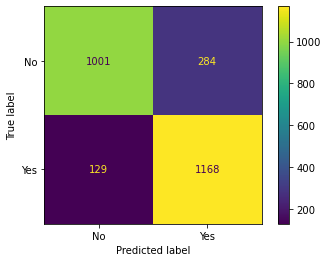

In [67]:
gb_best = gb_grid.best_estimator_
y3_pred = gb_best.predict(X_test)

model.append('Gradient Boost (HT)')
acc.append(accuracy_score(y_test,y3_pred))
print(classification_report(y_test,y3_pred))
plot_confusion_matrix(gb_best,X_test,y_test)

### 4. Ada Boost

In [69]:
ab_param_grid = {'n_estimators':[40,50,100,120,200],
                 'learning_rate':[0.1,0.5,1,2]}
print(ab_param_grid)

{'n_estimators': [40, 50, 100, 120, 200], 'learning_rate': [0.1, 0.5, 1, 2]}


In [70]:
ab = AdaBoostClassifier()
ab_grid = GridSearchCV(ab,ab_param_grid)
ab_grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1, 2],
                         'n_estimators': [40, 50, 100, 120, 200]})

In [71]:
ab_grid.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [72]:
ab_grid.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=200)

              precision    recall  f1-score   support

          No       0.81      0.73      0.77      1285
         Yes       0.75      0.83      0.79      1297

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582



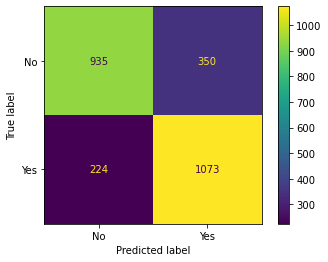

In [73]:
ab_best = ab_grid.best_estimator_
y4_pred = ab_best.predict(X_test)

model.append('Ada Boost (HT)')
acc.append(accuracy_score(y_test,y4_pred))
print(classification_report(y_test,y4_pred))
plot_confusion_matrix(ab_best,X_test,y_test)

### Overall Model Scores

In [75]:
data = {'Models':model,
       'Accuracy':acc}
df_res = pd.DataFrame(data)

In [79]:
df_res = df_res.drop(index=11)

In [80]:
df_res

,Models,Accuracy
0,Decision Trees,0.718750
1,Random Forest,0.798295
2,Gradient Descent Boost,0.818182
3,Ada Boost,0.829545
4,Decision Trees OverSampled,0.859024
5,Random Forest OverSampled,0.885360
6,Gradient Descent Boost OverSampled,0.783888
7,Ada Boost OverSampled,0.770333
8,Decision Tree (HT),0.819132
9,Random Forest (HT),0.881875


### Conclusion:
1. We can observe that our models score improved a lot after performing oversampling
2. Hypertuned models performed only slightly better
3. Top predictive features are Payment Methods, contract type, total & monthly charges and tenure
4. Hypertuned Decision Tree, Random Forest, Gradient Boost performed better than Ada boost